**Tarea 1**

**a) Formule una hipótesis respecto a las preguntas: ¿Tendrá alguna incidencia elegir una de las
dos opciones opciones en el tiempo que demora resolver el problema? ¿Por qué?**

Existirá una incidencia en elegir una de las dos opciones en el tiempo de resolución del problema de acuerdo a como se almacenan las matrices en la memoria RAM. Si las matrices se van guardando por filas en la RAM, entonces se guardarán la cantidad de filas que quepan en una página de tamaño B del cache. En caso contrario, se guardarán las columnas de la matriz que quepan en el cache.

Se hipotetiza que el programa guardará la matriz por fila, por lo que la operación fold_by_row será más rápida que fold_by_column dado que habran menos cache misses al haber una mejor localidad de referencia a los datos necesitados computar.









**b) Formalice su hipótesis en un análisis asintótico de la cantidad de accesos a la memoria externa,
en función del tamaño n del input y del tamaño B de una página del caché**

  Bajo el supuesto que cada vez que se realiza un cache miss, toda la información de la página del cache es reemplazada, se llego al siguiente análisis.


Siendo el tamaño del input $n=n_1*n_1$, con $n$ el orden de la matriz, dado que para fold_by_row existirá mejor localidad de referencia al acceder a los datos de la matriz por fila, existirán únicamente $ceil(n/B)$ cache misses. Esto es debido a que para fold_by_row hay que acceder a todos los datos de las $n_1$ filas, y como en RAM las filas están almacenadas de manera secuencial solo será necesario ver la cantidad de veces que necesito llenar una página del caché de tamaño $B$ con el contenido de $n_1$ filas. Esto se calcula como $n_1/B$ accesos por fila por las $n_1$ filas que hay, lo que queda como $ceil(n_1^2/B)=ceil(n/B)$. Eso resulta en $O(n/B)=O(n)$




En el caso de fold_by_column, dado que se accede por columnas y la matriz está guardada por filas en las páginas del caché, para el peor caso se tienen que acceder a caché por cada elemento de la matriz. Esto es considerando que en el peor caso cada vez que se traiga una página a memoria solo voy a tener un elemento de la columna (dado que en una página de tamaño B podria no caber más de una fila) y necesito computar elementos por columna. Por lo que se deben hacer $n_1$ accesos por columna en el peor caso. Esto queda en $O(n)$.



**c) Analice sus resultados y evalúe si su hipótesis se cumplió y a qué se debió el hecho de cumplirse,
o no. En particular, si observa diferencias en el comportamiento de las estrategias, intente
identificar a partir de qué tamaño de entrada ocurre y por qué sucede.**

Se observa a partir de los resultados que ambas estrategias rinden más o menos parecidos hasta el orden 7500 de matrices. Con matrices de mayor orden fold_by_row es significativamente más rápido que fold_by_col. Se puede concluir entonces que desde matrices de orden 7500, los crecimientos de ambas matrices aumentan dado que el tamaño de caché se debe llenar alrededor de ese orden. Por lo que después de ese orden, se requiere más de un acceso a caché para leer el input entero en ambas estrategias. Donde la hipotesis planteada es confirmada dado que fold_by_row tiene un notable menor tiempo de ejecución dado que requiere menos accesos al caché que fold_by_col.

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import time

In [6]:
tamano = []
for i in range (2,15):
  tamano.append(2**i)

print(tamano)


[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


In [3]:
def length(matrix):
  return matrix.shape[0]

def by_row_fold(A):
  x=0
  n = length(A)
  for i in range (0,n):
    for j in range (0,n):
      x = A[i][j] ^ x
  return x


def by_col_fold(A):
  x=0
  n = length(A)
  for j in range(0,n):
    for i in range(0,n):
      x = A[i][j] ^ x
  return x



In [7]:

#para cada tamaño calcular el promedio
prom_row=[]
prom_col=[]

for size in tamano:
  for i in range(10):
    
    
    A = np.random.randint(256, size=(size,size))
  
    start_row=time.time()
    by_row_fold(A)
    end_row=time.time()
    
    prom_row.append(end_row-start_row)

    start_col=time.time()
    by_col_fold(A)
    end_col=time.time()

    prom_col.append(end_col-start_col)






In [9]:

# Se generan 10 repeticiones por 13 tamaños
# 130 promedios, cada 10 es por un tamaño
row_fold_means=[]
col_fold_means=[]

for i in range(0,130,10):
  row_fold_means.append(np.mean(prom_row[i:i+10]))
  col_fold_means.append(np.mean(prom_col[i:i+10]))

print(row_fold_means)
print(col_fold_means)



[1.4066696166992188e-05, 2.160072326660156e-05, 7.412433624267578e-05, 0.0002819538116455078, 0.0011514663696289063, 0.004498052597045899, 0.018253278732299805, 0.07536675930023193, 0.2996448755264282, 1.220802617073059, 4.8774944067001345, 19.534650802612305, 78.76967072486877]
[6.890296936035156e-06, 2.2721290588378906e-05, 7.367134094238281e-05, 0.0002911090850830078, 0.0011046648025512696, 0.004448199272155761, 0.01925382614135742, 0.08734076023101807, 0.33662497997283936, 1.555008625984192, 6.993274736404419, 28.042642760276795, 128.99349071979523]


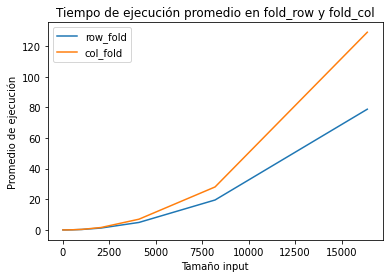

In [10]:

x_values=tamano
fun_1_results=row_fold_means
fun_2_results=col_fold_means
x_label_name="Tamaño input"
y_label_name="Promedio de ejecución"
fun_1_label="row_fold"
fun_2_label="col_fold"
chart_title="Tiempo de ejecución promedio en fold_row y fold_col"

fig = plt.figure()
plt.xlabel(x_label_name)
plt.ylabel(y_label_name)
plt.plot(x_values, fun_1_results, '-', label=fun_1_label)
plt.plot(x_values, fun_2_results, '-', label=fun_2_label)
plt.title(chart_title)
plt.legend()
plt.show()